# Lending Club Project

This is the final project for the Data Science & Machine Learning Bootcamp from Udemy. This is only meant as a demonstration of skills. Project is divided in a series of tasks from EDA, Data PreProcessing & Evaluating Model Performance. 

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

In [182]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [183]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [184]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
emp_title               373103 non-null object
emp_length              377729 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
title                   394275 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-nu

# Section 1: EDA

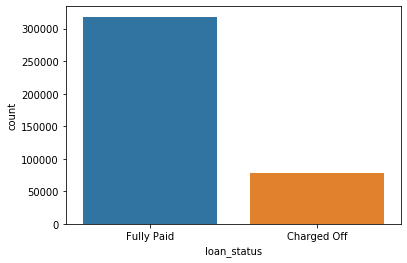

In [5]:
sns.countplot(x='loan_status', data=df)

This let's us know that the data might be biased as there is significantly more people that paid their loan in respect to whom did not. 

(0, 40000)

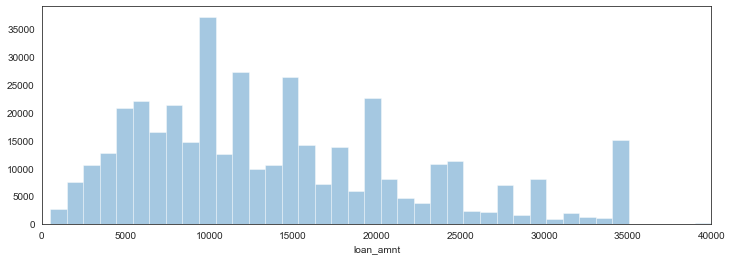

In [7]:
sns.set_style('white')
plt.figure(figsize=(12,4))
sns.distplot(df['loan_amnt'], kde=False, bins=40)
plt.xlim(0,40000)

Most loans are multiples of 5,000 but the majority of loans are of $10,000

In [8]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


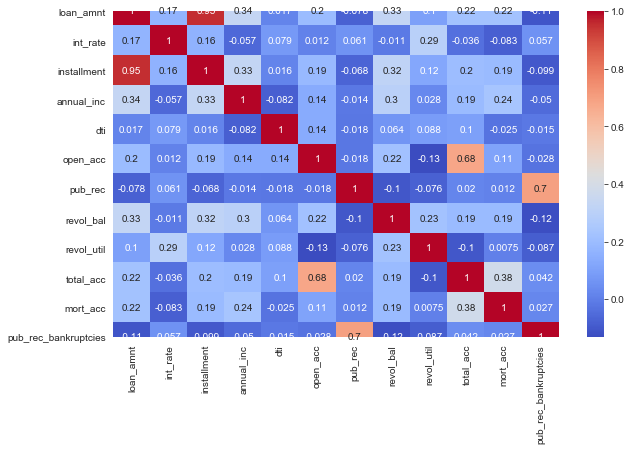

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(data=df.corr(), cmap='coolwarm', annot=True)

Installment is highly correlated to loan_amnt which is to be expected as is total_acc with open_acc. We will explore the installment variable further.

As a side note, the current version of Matplotlib is 3.11 which cuts off the heatmap. This is going to be fixed in version 3.12 which is still yet to come. 

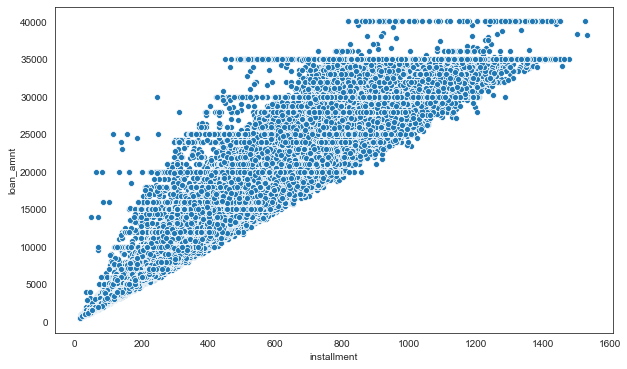

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='installment', y='loan_amnt', data=df, palette='viridis')

Makes sense that the installment will be higher as the loan amount increases. There are ,however, some low installments with relatively high loan amounts. 

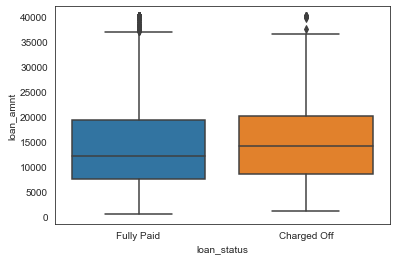

In [16]:
sns.boxplot(x='loan_status', y='loan_amnt', data=df)

The median is similar among the two loan statuses. But the amount that was charged of was slightly higher as well. 

In [17]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


One important variable is the **loan grade**. This determines the trustworthiness of that loan based on that person's credit history. 

In [19]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [39]:
sort_subg = sorted(df['sub_grade'].unique())
print(sort_subg) # In this way to show it horizontally, to avoid it being a long column.

['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


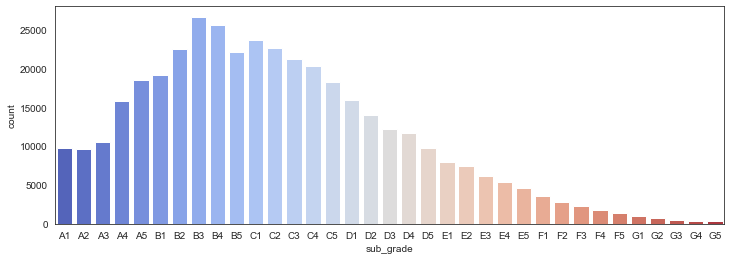

In [43]:
plt.figure(figsize=(12,4))
sns.countplot(x='sub_grade', data=df, palette='coolwarm', order=sort_subg)

Let's see how many of the loans in each sub_grade was fully paid or charged off. 

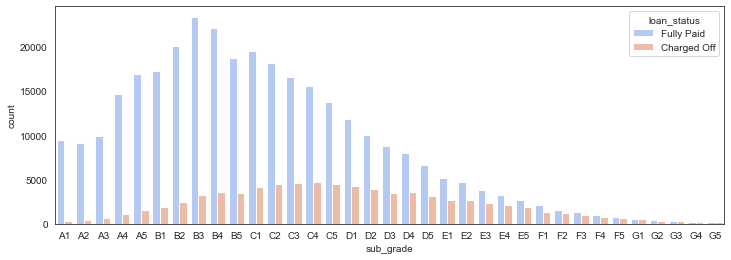

In [44]:
plt.figure(figsize=(12,4))
sns.countplot(x='sub_grade', data=df, hue='loan_status', palette='coolwarm', order=sort_subg)

In the case of F and G graded loans, the proportion of fully paid and charged off loans is more or less the same. For further incorporation into algorithms it would be better to have the loan_status variable as a 1 or 0. 

In [185]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [50]:
df[['loan_status', 'loan_repaid']].head(5) # To check if the new variable is associating correctly

,loan_status,loan_repaid
0,Fully Paid,1
1,Fully Paid,1
2,Fully Paid,1
3,Fully Paid,1
4,Charged Off,0


As a challenge task the project asked to create a bar plot showing the correlation of the numeric features to the new loan_repaid column. 

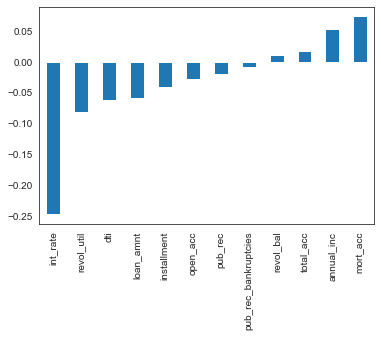

In [52]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar') # Droping loan repaid to avoid the 
                                                                            # perfect correlation with itself

# Section 2: Data Preprocessing

First, we want to check for any **missing values**. This can be done in absolute or relative terms.

In [56]:
df.isnull().sum() # Absolute

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [57]:
df.isnull().sum()/len(df) # Relative

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               0.057892
emp_length              0.046211
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.004431
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.000697
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.095435
pub_rec_bankruptcies    0.001351
address                 0.000000
loan_repaid             0.000000
dtype: float64

As we can see morg_acc, emp_length and emp_title are the variables with the most missing data. Let's examine emp_title first. 

In [60]:
print('Unique employment titles from loan seekers: ',df['emp_title'].nunique())

Unique employment titles from loan seekers:  173105


There's way too many unique titles in order to make dummy variables out of it or try to classify them further. For this reason I'll drop this variable.  

In [186]:
df = df.drop('emp_title', axis=1)

Now let's take a look at the employment length: 

In [65]:
sorted(df['emp_length'].dropna().unique()) # This is not sorted properly and therefore will create a custom variable. 

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [66]:
sort_emp_len = ['< 1 year', '1 year', '2 years', '3 years','4 years','5 years','6 years','7 years','8 years',
 '9 years', '10+ years']
sort_emp_len

['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

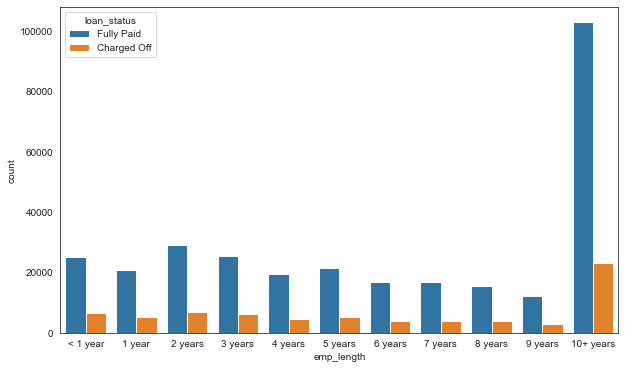

In [67]:
plt.figure(figsize=(10,6))
sns.countplot(x='emp_length', order=sort_emp_len, data=df, hue='loan_status')

In [69]:
emp_co = df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']

In [70]:
emp_fp = df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']

In [82]:
emp_len = emp_co/emp_fp
emp_len

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

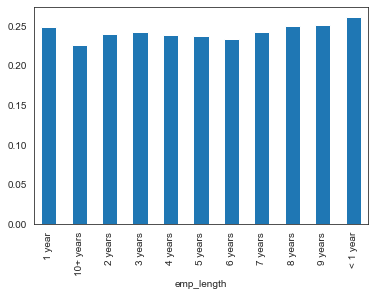

In [83]:
emp_len.plot(kind='bar')

As we can see charged off rates are very similar among all the employment length categories. We will drop the variable as it has missing data and doesn't have that much explanatory power. 

In [187]:
df = df.drop('emp_length', axis=1)

Let's check where we still have missing data:

In [87]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

Let's check if there is any relationship between the title variable, which has missing values, and the purpose variable which doesn't.

In [89]:
df['title'].head()

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
Name: title, dtype: object

In [90]:
df['purpose'].head()

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
Name: purpose, dtype: object

Since they are only different in the added underscore, I will drop the title variable. 

In [188]:
df = df.drop('title', axis=1)

In [99]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

Most of our missing values are now concentrated on the mortgage accounts variable. Let's go deeper in order to decide whether to drop the variable or keep it and make some sort of imputation. 

In [95]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [100]:
print('Correlation between mort_acc and other variables is:')
df.corr()['mort_acc'].sort_values()

Correlation between mort_acc and other variables is:


int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

We can better visualize this as we did with the 'loan_repaid' variable before in this way:

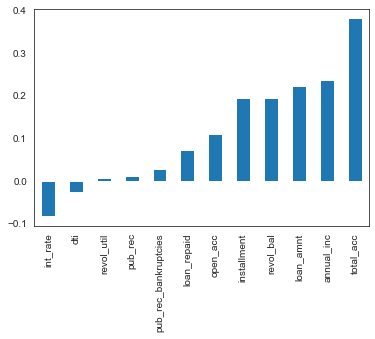

In [97]:
df.corr()['mort_acc'].sort_values().drop('mort_acc').plot(kind='bar')

The 'total_acc' variable has the highest correlation with mort_acc. We can try to build a way to imputate the mean of the mortgage account in each total account row.   

In [189]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [190]:
def impute_mort_acc(total_acc, mort_acc):
    
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [191]:
df['mort_acc'] = df.apply(lambda x: impute_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [104]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

Seems like we are almost done. As the revol_util and pub_rec_bankruptcies have a very low amount of missing values, I will just drop the rows that have them.

In [192]:
df = df.dropna()

In [193]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

### Categorical Variables and Dummy Variables 

In [194]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

Let's start with the term variable to see how to better adapt it. 

In [110]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

As it only has two unique values we can change it to be just integers:

In [195]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [113]:
df['term'].unique()

array([36, 60])

With this done, the next object type variable is **grade**. Nonetheless, we know the subgrade variable contains this one. I'll therefore drop it:

In [196]:
df = df.drop('grade', axis=1)

In [197]:
sub_grade_dummies = pd.get_dummies(df['sub_grade'], drop_first=True)

In [198]:
df = pd.concat([df.drop('sub_grade', axis=1), sub_grade_dummies], axis=1)

Let's check the home ownership variable in order to understand how to better suit it for the algorithms.

In [199]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [200]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

As we can see most observations are concentrated in just 6 categories of home ownership. However, ANY and NONE can be grouped with OTHER:

In [201]:
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [202]:
dummies = pd.get_dummies(df['home_ownership'], drop_first=True)
df = pd.concat([df, dummies], axis=1)

In [203]:
df = df.drop('home_ownership', axis=1)

With Home Ownership turned into dummy variables we can move on to the next object type variables:

In [204]:
df.select_dtypes(['object']).columns

Index(['verification_status', 'issue_d', 'loan_status', 'purpose',
       'earliest_cr_line', 'initial_list_status', 'application_type',
       'address'],
      dtype='object')

We will address verification status, application type, initial list status and purpose next.

In [205]:
dummies = pd.get_dummies(df[['verification_status','application_type', 'initial_list_status', 'purpose']], drop_first=True)
df = df.drop(['verification_status','application_type', 'initial_list_status', 'purpose'], axis=1)
df = pd.concat([df, dummies], axis=1)

The last part of every address is the zipcodes, which repeat among some observations. Therefore, we can feature engineer a zipcode column by taking the last 5 characters in the address' string.

In [132]:
df['address'].head(3)

0       0174 Michelle Gateway\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
Name: address, dtype: object

In [206]:
df['zipcode'] = df['address'].apply(lambda x: x[-5:])

In [140]:
df['address'].head(3)

0    22690
1    05113
2    05113
Name: address, dtype: object

In [141]:
df['zipcode'].nunique()

10

From hundreds of different addresses we now have 10 unique zipcodes that we can convert to dummy variables: 

In [207]:
dummies = pd.get_dummies(df['zipcode'], drop_first=True)
df = df.drop(['address', 'zipcode'], axis=1)
df = pd.concat([df, dummies], axis=1)

In [208]:
df.select_dtypes(['object']).columns

Index(['issue_d', 'loan_status', 'earliest_cr_line'], dtype='object')

Let's start with the issue_d variable:

In [145]:
df['issue_d'].head(2)

0    Jan-2015
1    Jan-2015
Name: issue_d, dtype: object

The date in which the loan was issued would be considered **date leakage** as we are trying to predict the loan_repaid variable. I'll drop it. 

In [209]:
df = df.drop('issue_d', axis=1)

Let's go deeper on the earliest credit line to see if there is any useful information we can extract. 

In [147]:
df['earliest_cr_line'].head(2)

0    Jun-1990
1    Jul-2004
Name: earliest_cr_line, dtype: object

This is not data leakage and it's actually important to know the earliest credit line, but perhaps we can conform to the year. 

In [210]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda x: int(x[-4:]))

In [211]:
df = df.drop('earliest_cr_line', axis=1)

In [158]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

Lastly, we can drop the loan_status column as it has already been codified dicotomically in loan_repaid:

In [212]:
df = df.drop('loan_status', axis=1)

## Train Test Split 

In [213]:
from sklearn.model_selection import train_test_split

In [214]:
X = df.drop('loan_repaid', axis=1).values
y = df['loan_repaid'].values

I will take a sample from our dataframe in which to perform the operations as to not clog the RAM on my computer. 

In [215]:
df = df.sample(frac=0.1,random_state=101)
len(df)

39522

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In order to continue we need to **normalize** our X_test and X_train variables to get them to be in the range from 0 to 1. Y_test and y_train don't need to be normalized as it is either 0 or 1. 

In [217]:
from sklearn.preprocessing import MinMaxScaler

In [218]:
scaler = MinMaxScaler()

In [219]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

It is always a best practice to check one last time all the variables that going to go into the learning algorithms. 

In [220]:
df.info() # All 79 variables are ready to be used

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39522 entries, 204901 to 160674
Data columns (total 79 columns):
loan_amnt                              39522 non-null float64
term                                   39522 non-null int64
int_rate                               39522 non-null float64
installment                            39522 non-null float64
annual_inc                             39522 non-null float64
dti                                    39522 non-null float64
open_acc                               39522 non-null float64
pub_rec                                39522 non-null float64
revol_bal                              39522 non-null float64
revol_util                             39522 non-null float64
total_acc                              39522 non-null float64
mort_acc                               39522 non-null float64
pub_rec_bankruptcies                   39522 non-null float64
loan_repaid                            39522 non-null int64
A2                   

### Creating the model

In [221]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

The model is going to be composed of:

- One Input Layer with 79 neurons with Rectified Linear Unit as activation function.

- Two Hidden Layers with Rectified Linear Unit as activation function, the first with 39 neurons and next second with 19 neurons.

- One Output Layer: a single neuron with an the sigmoid activation function.

The input and hidden layers also include a dropout rate of 20%.

Moreover as a loss function I'll use Binary Cross Entropy and Adam as the optimizer. 

In [222]:
model = Sequential()

# Input layer
model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))

# Hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compiler 
model.compile(loss="binary_crossentropy", optimizer="adam")

Next I'll fit the mode:

In [171]:
model.fit(X_train, 
          y_train,
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test)
         )

Train on 316175 samples, validate on 79044 samples
Epoch 1/25
316175/316175 [==============================] - 5s 16us/sample - loss: 0.3035 - val_loss: 0.2650
Epoch 2/25
316175/316175 [==============================] - 5s 15us/sample - loss: 0.2652 - val_loss: 0.2632
Epoch 3/25
316175/316175 [==============================] - 5s 16us/sample - loss: 0.2630 - val_loss: 0.2624
Epoch 4/25
316175/316175 [==============================] - 6s 18us/sample - loss: 0.2619 - val_loss: 0.2621
Epoch 5/25
316175/316175 [==============================] - 6s 18us/sample - loss: 0.2611 - val_loss: 0.2618
Epoch 6/25
316175/316175 [==============================] - 5s 16us/sample - loss: 0.2606 - val_loss: 0.2617
Epoch 7/25
316175/316175 [==============================] - 4s 14us/sample - loss: 0.2602 - val_loss: 0.2614
Epoch 8/25
316175/316175 [==============================] - 4s 14us/sample - loss: 0.2596 - val_loss: 0.2616
Epoch 9/25
316175/316175 [==============================] - 5s 16us/sample - 

In [172]:
losses = pd.DataFrame(model.history.history)

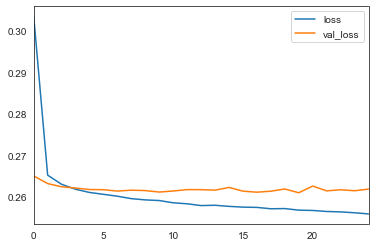

In [173]:
losses[['loss','val_loss']].plot()

The graph of loss and the actual loss value shows that I am overfitting before the 5th epoch. Next we are going to see the metrics in under to evaluate the model: 

In [174]:
from sklearn.metrics import classification_report, confusion_matrix

In [177]:
predictions = model.predict_classes(X_test)

In [180]:
print('Classification Report: \n', classification_report(y_test, predictions))

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [181]:
print('Confusion Matrix: \n', confusion_matrix(y_test, predictions))

Confusion Matrix: 
 [[ 6870  8788]
 [  124 63262]]


The problem at hand was to predict wether a loan would be fully paid or charged off. However, we observed the proportion of Fully Paid and Charged Off was not balanced. Therefore, accuracy is not a good metric to guide the success of this model. 

The ability of the model to identify all the relevant cases within the dataset (recall) was only 44% for the charged off loans. 

While recall expresses the ability to find all relevant instances in a dataset, precision expresses the proportion of the data points our model says was relevant actually were relevant.

The riskiest result is the charged off (0) which this model's precision was very high at 98%. Will therefore stop here. 